In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/feature_selection/')
sys.path.append(custom_library_path)

import selection_vars

In [2]:
# import the most corrolated variables from the time series
vars_selected_40 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_40.csv')
vars_selected_40 = vars_selected_40['Unnamed: 0'].values

vars_selected_30 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_30.csv')
vars_selected_30 = vars_selected_30['Unnamed: 0'].values

vars_selected_20 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_20.csv')
vars_selected_20 = vars_selected_20['Unnamed: 0'].values

In [3]:
# preparing the data

df_X_all_vars_40, scaled_X_40 = selection_vars.extract_timeseries(vars_selected_40)
df_X_all_vars_30, scaled_X_30 = selection_vars.extract_timeseries(vars_selected_30)
df_X_all_vars_20, scaled_X_20 = selection_vars.extract_timeseries(vars_selected_20)

df_y = selection_vars.extract_timeseries_y()

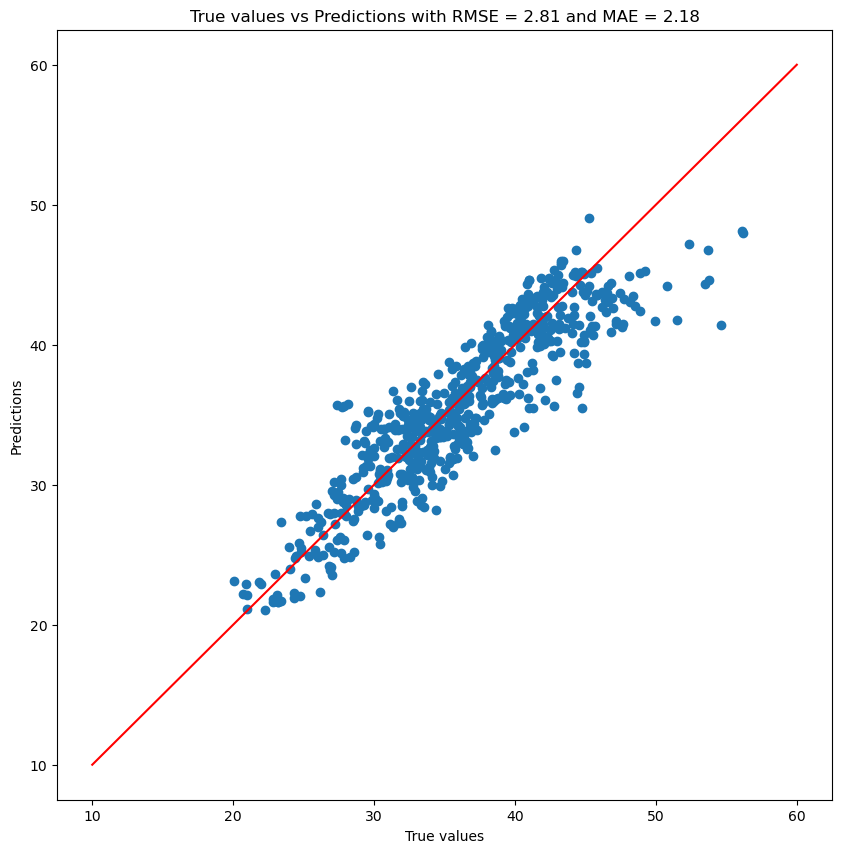

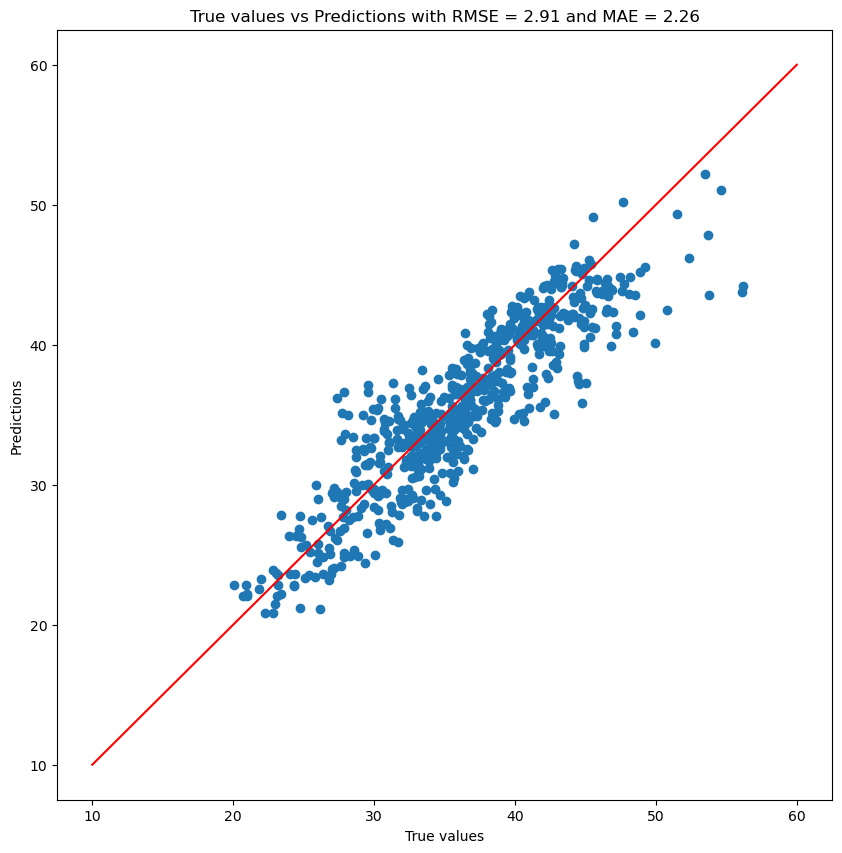

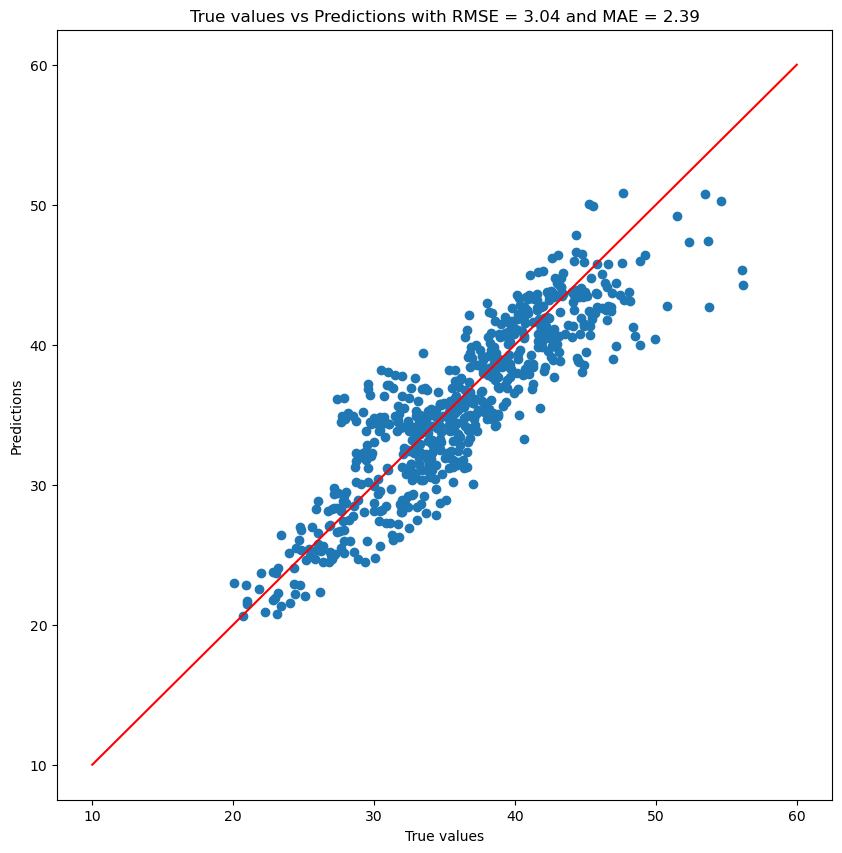

In [6]:
def plot_and_train_xgb(scaled_X, df_y):
    # separate the data into training and testing
    X_train = scaled_X[:int(0.8*len(scaled_X))]
    X_test = scaled_X[int(0.8*len(scaled_X)):]
    y_train = df_y[:int(0.8*len(df_y))]
    y_test = df_y[int(0.8*len(df_y)):]

    # fit the model
    model = XGBRegressor(n_jobs=-1)
    model.fit(X_train,y_train)

    # predictions
    y_pred = model.predict(X_test)

    # check the rmse and mae
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # plot the predictions
    plt.figure(figsize=(10, 10))
    plt.plot(y_test, y_pred, 'o')
    # plot the line
    x = np.linspace(10, 60, 100)
    plt.plot(x, x, color='r')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.title('True values vs Predictions with RMSE = {:.2f} and MAE = {:.2f}'.format(rmse, mae))
    plt.show()

    return model, rmse, mae

model_40, rmse_40, mae_40 = plot_and_train_xgb(scaled_X_40, df_y)
model_30, rmse_30, mae_30 = plot_and_train_xgb(scaled_X_30, df_y)
model_20, rmse_20, mae_20 = plot_and_train_xgb(scaled_X_20, df_y)

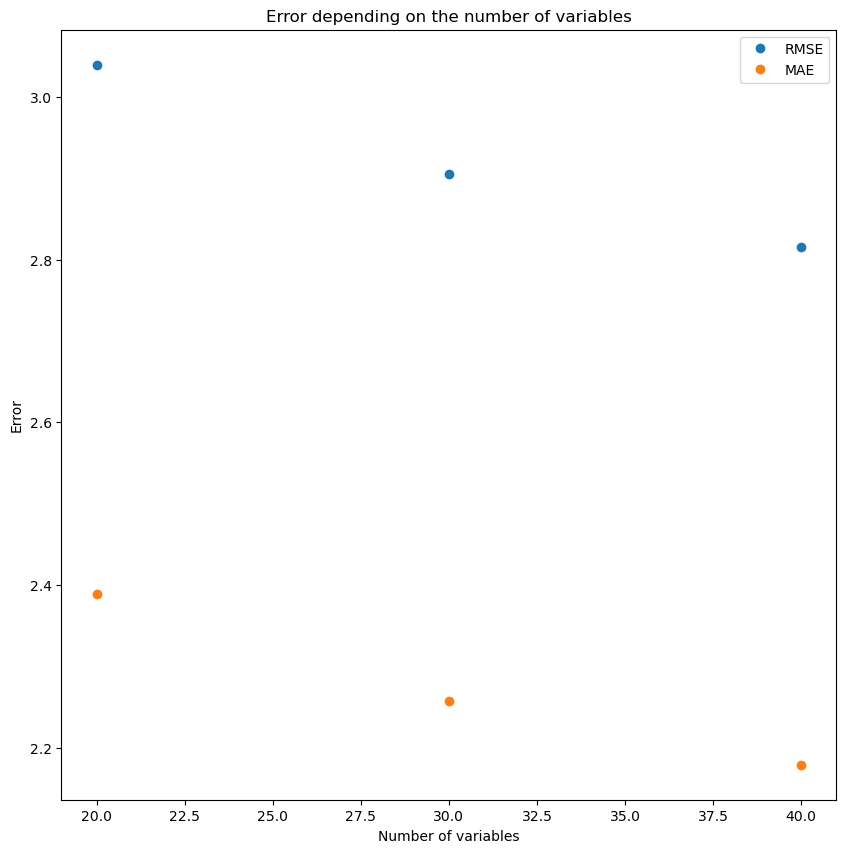

In [7]:
# plot the different rmse and mae
plt.figure(figsize=(10, 10))
plt.plot([40, 30, 20], [rmse_40, rmse_30, rmse_20], 'o', label='RMSE')
plt.plot([40, 30, 20], [mae_40, mae_30, mae_20], 'o', label='MAE')
plt.xlabel('Number of variables')
plt.ylabel('Error')
plt.title('Error depending on the number of variables')
plt.legend()
plt.show()

In [5]:
# Initialize the sequential feature selector

selected_features_40 = selection_vars.feature_selection(df_X_all_vars_40, scaled_X_40, df_y, model_40)
selected_features_30 = selection_vars.feature_selection(df_X_all_vars_30, scaled_X_30, df_y, model_30)
selected_features_20 = selection_vars.feature_selection(df_X_all_vars_20, scaled_X_20, df_y, model_20)

Selected features: Index(['10m_u_component_of_wind_max', 'mean_sea_level_pressure_std',
       '10m_v_component_of_wind_max', 'mean_surface_latent_heat_flux_min',
       'total_precipitation_mean'],
      dtype='object')
Selected features: Index(['10m_u_component_of_wind_max', 'mean_sea_level_pressure_std',
       '10m_v_component_of_wind_max', 'surface_latent_heat_flux_mean',
       'surface_pressure_min'],
      dtype='object')
Selected features: Index(['10m_u_component_of_wind_max', 'mean_sea_level_pressure_std',
       '10m_v_component_of_wind_max', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_mean'],
      dtype='object')
